# 1. 관심있는 데이터 
## 계속 변화하는 사회에 맞춰 여러가지 정책을 개선할 수 있는 데이터 
### 이유 : 현재 정책이 어떻게 작동하고 있는지 평가하고 정책의 효과를 측정하고 개선점을 찾는 것이 좋다고 생각합니다.
- 예) 한국복지패널 데이터 
- 깃허브에서 'Koweps_hpwc14_2019_beta2' 로 다운받을 수 있음

# 과제 _ 따릉이 데이터 EDA

In [68]:
# 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
%config lnlineBackend.figure_format = 'retina'

## 따릉이 데이터(SeoulBikeData)

- date : 대여 날짜
- Rented Bike Count : 대여된 자전거 수
- Hour : 대여시간
- Temperature : 기온
- Humidity(%) : 습도
- Wind speed (m/s) : 풍속
- Visibility (10m) : 기상 상태에 따른 가시성
- Dew point temperature : 이슬점 온도
- Solar Radiation (MJ/m2) : 태양 복사량
- Rainfall(mm) : 강우량(비)
- Snowfall (cm) : 적설량(눈)
- Seasons : 계절
- Holiday : 휴일여부 (Holiday / No Holiday)
- Functioning Day : 대여소 운영여부 (Yes / No)

In [4]:
##데이터 불러오기
data = pd.read_csv("C:/Users/jisoo sung/OneDrive/바탕 화면/비어플/SeoulBikeData.csv")
data.head() # 맨 앞 5행 추출

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
## 데이터 정보 확인
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(�C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(�C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [12]:
# 결측치 개수
data.isna().sum(axis=0).sort_values()

# 중복행 확인
data[data.duplicated()]

## 결측치, 중복행 없음

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


# Rented Bike Count & Hour
- 대여된 자전거 수
- 8시, 18시에 대여 수가 가장 많다. (출퇴근시간 이용 수 증가 예상)
- 23시~6시에 대여수는 다른 시간대에 비해 적다.

In [48]:
data.groupby('Hour')['Rented Bike Count'].mean()

Hour
0      541.460274
1      426.183562
2      301.630137
3      203.331507
4      132.591781
5      139.082192
6      287.564384
7      606.005479
8     1015.701370
9      645.983562
10     527.821918
11     600.852055
12     699.441096
13     733.246575
14     758.824658
15     829.186301
16     930.621918
17    1138.509589
18    1502.926027
19    1195.147945
20    1068.964384
21    1031.449315
22     922.797260
23     671.126027
Name: Rented Bike Count, dtype: float64

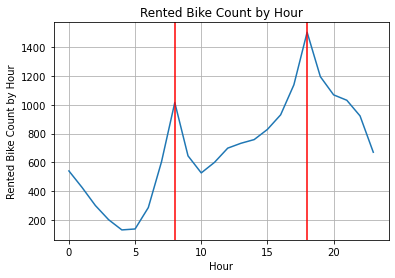

C:\Users\jisoo sung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

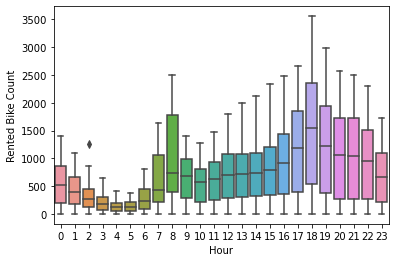

In [47]:
plt.plot(data.groupby('Hour')['Rented Bike Count'].mean()) 
plt.grid()
plt.title("Rented Bike Count by Hour")
plt.xlabel("Hour",fontsize=10)
plt.ylabel("Rented Bike Count by Hour",fontsize=10)

plt.axvline(8,color='red')
plt.axvline(18,color='red')
plt.show()

sns.boxplot(data['Hour'],data['Rented Bike Count'])

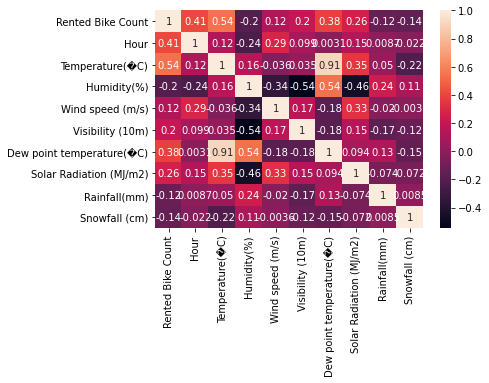

In [49]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [51]:
data.groupby('Date')['Rented Bike Count'].sum() #날짜별 대여 자전거 수
data.groupby('Seasons')['Rented Bike Count'].sum() #계절별 대여 자전거 수
data.groupby('Holiday')['Rented Bike Count'].sum() #휴일/휴일x의 대여 자전거 수
data.groupby('Hour')['Rented Bike Count'].sum() #시간별 대여 자전거 수

Hour
0     197633
1     155557
2     110095
3      74216
4      48396
5      50765
6     104961
7     221192
8     370731
9     235784
10    192655
11    219311
12    255296
13    267635
14    276971
15    302653
16    339677
17    415556
18    548568
19    436229
20    390172
21    376479
22    336821
23    244961
Name: Rented Bike Count, dtype: int64

# Rented Bike Count & Seasons
- 계절과 자전거 대여 수
- 여름에 대여 수가 가장 많고 겨울에 가장 적다. (아무래도 당연한거 아님?)

In [58]:
data.groupby('Seasons')['Rented Bike Count'].sum() #계절별 대여 자전거 수

Seasons
Autumn    1790002
Spring    1611909
Summer    2283234
Winter     487169
Name: Rented Bike Count, dtype: int64

<AxesSubplot:xlabel='Seasons', ylabel='Rented Bike Count'>

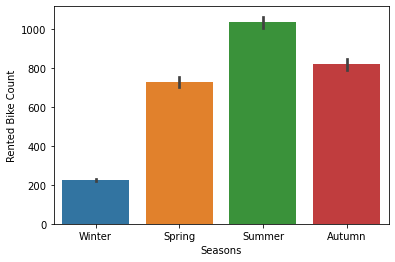

In [59]:
sns.barplot(data = data, x= 'Seasons', y='Rented Bike Count')

# Temperature 
- 기온과 대여량 수

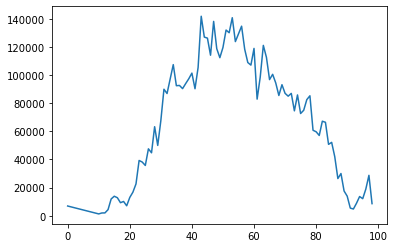

In [69]:
plt.plot(data.groupby('Humidity(%)')['Rented Bike Count'].sum())

# Rainfall(mm) & Snowfall (cm) : 적설량(눈)
- 강우량/적설량과 대여량 수
- 눈,비가 안올 때/적게 올 때의 대여량 수가 대부분이다

In [70]:
data.groupby('Rainfall(mm)')['Rented Bike Count'].sum()

Rainfall(mm)
0.0     6086009
0.1       15179
0.2        3706
0.3        1401
0.4        2147
         ...   
21.0         19
21.5        596
24.0         61
29.5        122
35.0        151
Name: Rented Bike Count, Length: 61, dtype: int64

In [73]:
data.groupby('Snowfall (cm)')['Rented Bike Count'].sum()

Snowfall (cm)
0.0    6090314
0.1        205
0.2       3643
0.3       8304
0.4       5981
0.5       4716
0.6       2775
0.7       5108
0.8       5632
0.9       4854
1.0       6357
1.1       1098
1.2        435
1.3       1092
1.4        429
1.5        168
1.6       3771
1.7        754
1.8       1551
1.9        703
2.0       4191
2.1        546
2.2       3813
2.3        897
2.4        792
2.5       1980
2.6       1303
2.7       1009
2.8        355
2.9        655
3.0       1169
3.1        119
3.2       1027
3.3        841
3.4        367
3.5       1856
3.6        436
3.7        789
3.8        276
3.9         94
4.0        160
4.1        459
4.2        116
4.3         50
4.8         80
5.0        374
5.1         62
6.0        241
7.0        167
7.1         24
8.8        176
Name: Rented Bike Count, dtype: int64

# Holiday : 휴일여부

- 휴일이 아닐 때 대여량 수가 훨씬 많다

In [78]:
data.groupby('Hour')['Holiday'].sum()

Hour
0     No HolidayNo HolidayNo HolidayNo HolidayNo Hol...
1     No HolidayNo HolidayNo HolidayNo HolidayNo Hol...
2     No HolidayNo HolidayNo HolidayNo HolidayNo Hol...
3     No HolidayNo HolidayNo HolidayNo HolidayNo Hol...
4     No HolidayNo HolidayNo HolidayNo HolidayNo Hol...
5     No HolidayNo HolidayNo HolidayNo HolidayNo Hol...
6     No HolidayNo HolidayNo HolidayNo HolidayNo Hol...
7     No HolidayNo HolidayNo HolidayNo HolidayNo Hol...
8     No HolidayNo HolidayNo HolidayNo HolidayNo Hol...
9     No HolidayNo HolidayNo HolidayNo HolidayNo Hol...
10    No HolidayNo HolidayNo HolidayNo HolidayNo Hol...
11    No HolidayNo HolidayNo HolidayNo HolidayNo Hol...
12    No HolidayNo HolidayNo HolidayNo HolidayNo Hol...
13    No HolidayNo HolidayNo HolidayNo HolidayNo Hol...
14    No HolidayNo HolidayNo HolidayNo HolidayNo Hol...
15    No HolidayNo HolidayNo HolidayNo HolidayNo Hol...
16    No HolidayNo HolidayNo HolidayNo HolidayNo Hol...
17    No HolidayNo HolidayNo HolidayNo Holi

C:\Users\jisoo sung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Holiday barplot')

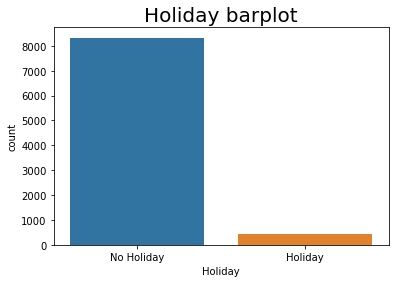

In [85]:
sns.countplot(data['Holiday'])
plt.title('Holiday barplot',fontsize=20)

# Functioning Day : 대여소 운영 여부
- 대여소가 운영할 때만 빌릴 수 있음 당연한말이자나


In [87]:
data['Functioning Day'].value_counts().values

array([8465,  295], dtype=int64)

In [91]:
data.groupby('Functioning Day')['Rented Bike Count'].sum()

Functioning Day
No           0
Yes    6172314
Name: Rented Bike Count, dtype: int64